## Phân tích và trực quan hóa

In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
path = '/content/drive/MyDrive/MachineLearning/data/preprocessed_data.csv'
df = pd.read_csv(path)
df.head()



,Battery capacity,Screen size,Resolution x,Resolution y,Storage,Rear camera,Front camera,RAM,Price_log,SIM_2,4G_Yes,CPU_4_6,CPU_8_10,OSs_Other,OSs_iOS
0,4085,6.67,1440,3120,256.0,48.0,16.0,12.0,6.476939,1,1,0,1,0,0
1,4000,6.50,1080,2400,64.0,64.0,16.0,6.0,5.733306,1,1,0,1,0,0
2,3110,6.10,828,1792,64.0,12.0,12.0,4.0,6.540886,1,1,1,0,0,1
3,4000,6.40,1080,2340,128.0,12.0,32.0,6.0,6.311535,0,0,0,1,0,0
4,3800,6.55,1080,2400,128.0,48.0,16.0,8.0,5.953841,1,1,0,1,0,0


### Phân tích tham số dữ liệu

In [22]:
# brief info
print(df.info(), "\n")

# Check for missing values
print(df.isnull().sum())

# Basic stats
print(df.describe().T)

# Correlation matrix
print(df.corr())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Battery capacity  1349 non-null   int64  
 1   Screen size       1349 non-null   float64
 2   Resolution x      1349 non-null   int64  
 3   Resolution y      1349 non-null   int64  
 4   Storage           1349 non-null   float64
 5   Rear camera       1349 non-null   float64
 6   Front camera      1349 non-null   float64
 7   RAM               1349 non-null   float64
 8   Price_log         1349 non-null   float64
 9   SIM_2             1349 non-null   int64  
 10  4G_Yes            1349 non-null   int64  
 11  CPU_4_6           1349 non-null   int64  
 12  CPU_8_10          1349 non-null   int64  
 13  OSs_Other         1349 non-null   int64  
 14  OSs_iOS           1349 non-null   int64  
dtypes: float64(6), int64(9)
memory usage: 158.2 KB
None 

Battery capacity    0
Screen size  

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Battery capacity  1349 non-null   int64  
 1   Screen size       1349 non-null   float64
 2   Resolution x      1349 non-null   int64  
 3   Resolution y      1349 non-null   int64  
 4   Storage           1349 non-null   float64
 5   Rear camera       1349 non-null   float64
 6   Front camera      1349 non-null   float64
 7   RAM               1349 non-null   float64
 8   Price_log         1349 non-null   float64
 9   SIM_2             1349 non-null   int64  
 10  4G_Yes            1349 non-null   int64  
 11  CPU_4_6           1349 non-null   int64  
 12  CPU_8_10          1349 non-null   int64  
 13  OSs_Other         1349 non-null   int64  
 14  OSs_iOS           1349 non-null   int64  
dtypes: float64(6), int64(9)
memory usage: 158.2 KB


In [24]:
num_cols = ['Screen size', 'Resolution x', 'Resolution y', 'Storage',
            'Rear camera', 'Front camera', 'RAM', 'Battery capacity']
bin_cols = ['SIM_2', '4G_Yes', 'CPU_4_6', 'CPU_8_10','OSs_Other','OSs_iOS']

In [25]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Screen size,1349.0,5.283640,0.665961,2.400,5.0,5.2,5.67,7.0
Resolution x,1349.0,808.260934,268.198554,240.000,720.0,720.0,1080.00,2160.0
Resolution y,1349.0,1483.480356,550.919076,320.000,1280.0,1280.0,1920.00,3840.0
Storage,1349.0,29.814648,33.419657,0.064,8.0,16.0,32.00,256.0
Rear camera,1349.0,11.993625,8.590219,0.000,8.0,12.2,13.00,64.0
Front camera,1349.0,6.998962,6.249636,0.000,2.0,5.0,8.00,48.0
RAM,1349.0,2.458302,1.597354,0.064,1.0,2.0,3.00,12.0
Battery capacity,1349.0,2932.180875,871.867999,1010.000,2300.0,2942.0,3500.00,6000.0


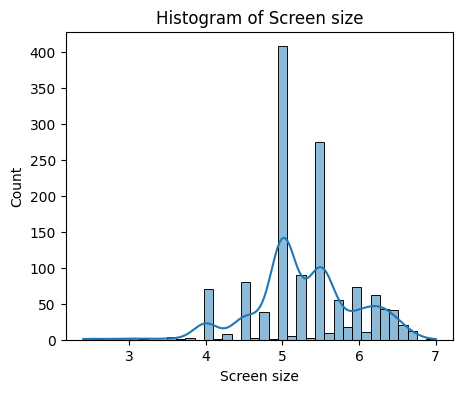

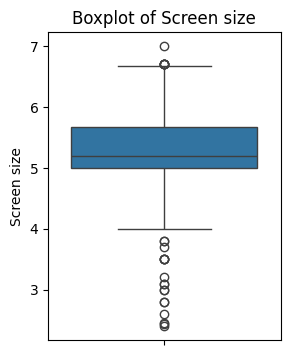

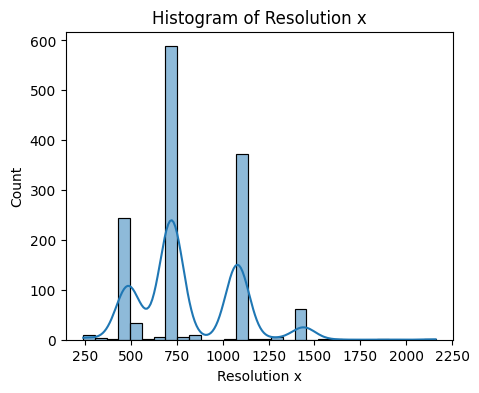

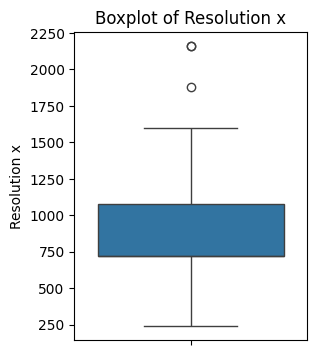

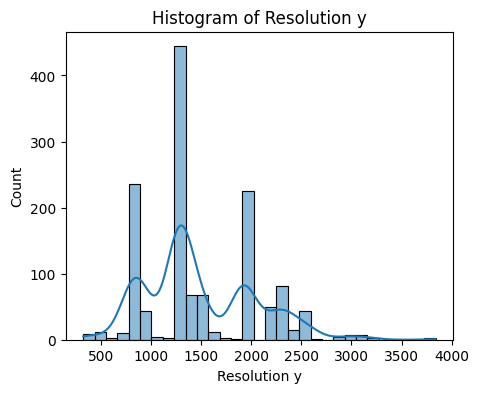

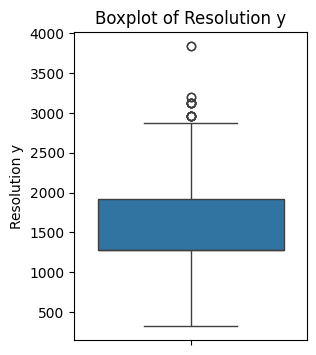

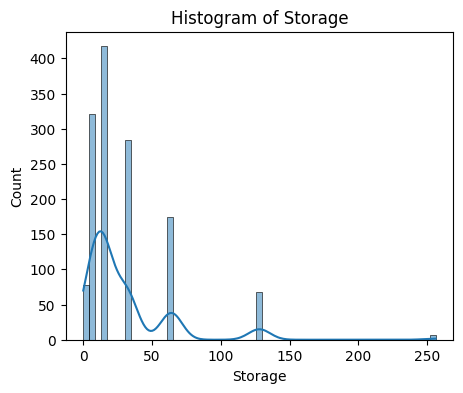

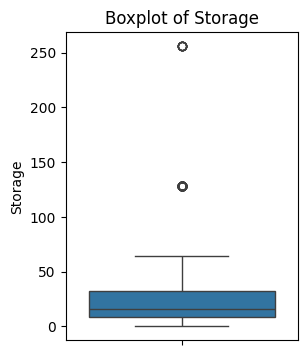

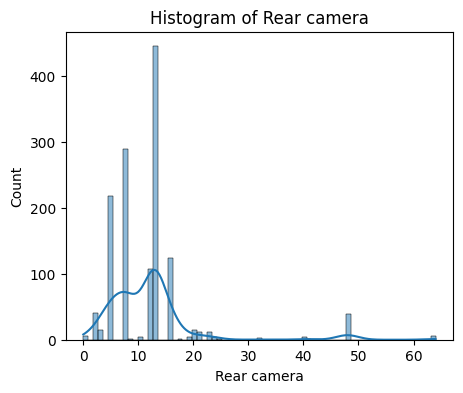

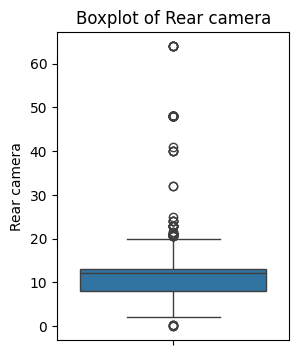

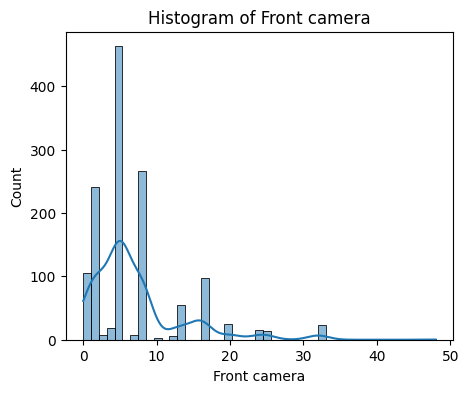

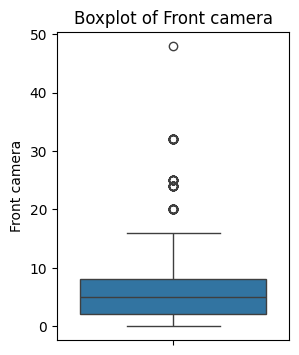

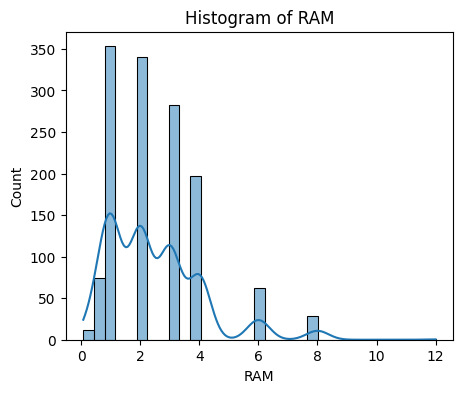

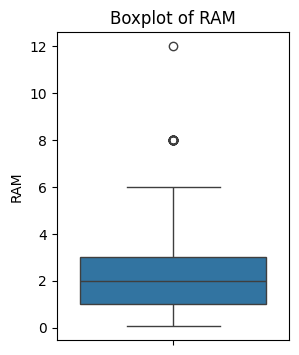

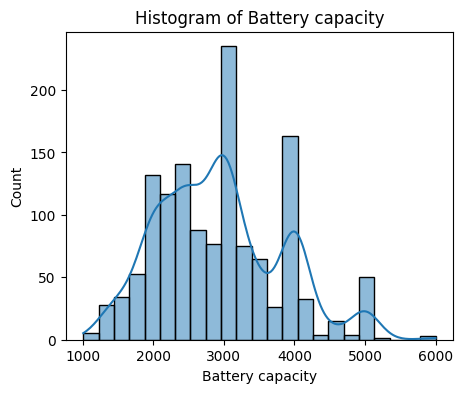

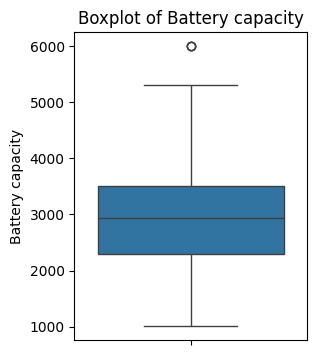

In [26]:
for col in num_cols:
    plt.figure(figsize=(5,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

    plt.figure(figsize=(3,4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

📊 Thống kê cơ bản của các biến nhị phân:


,Số lượng 1,Số lượng 0,Tỷ lệ (%)
SIM_2,1124,225,83.32
4G_Yes,1003,346,74.35
CPU_4_6,699,650,51.82
CPU_8_10,563,786,41.73
OSs_Other,42,1307,3.11
OSs_iOS,15,1334,1.11



📈 Mô tả chi tiết (describe):


,count,mean,std,min,25%,50%,75%,max
SIM_2,1349.0,0.833210,0.372927,0.0,1.0,1.0,1.0,1.0
4G_Yes,1349.0,0.743514,0.436855,0.0,0.0,1.0,1.0,1.0
CPU_4_6,1349.0,0.518162,0.499855,0.0,0.0,1.0,1.0,1.0
CPU_8_10,1349.0,0.417346,0.493304,0.0,0.0,0.0,1.0,1.0
OSs_Other,1349.0,0.031134,0.173745,0.0,0.0,0.0,0.0,1.0
OSs_iOS,1349.0,0.011119,0.104899,0.0,0.0,0.0,0.0,1.0


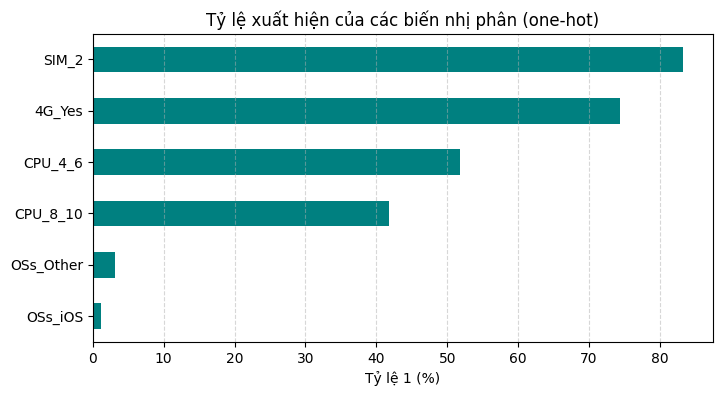

In [27]:
bin_summary = pd.DataFrame({
    'Số lượng 1': df[bin_cols].sum(),
    'Số lượng 0': len(df) - df[bin_cols].sum(),
    'Tỷ lệ (%)': (df[bin_cols].mean() * 100).round(2)
})
print("📊 Thống kê cơ bản của các biến nhị phân:")
display(bin_summary)

# 2️⃣ Thống kê tổng hợp mô tả chi tiết hơn
print("\n📈 Mô tả chi tiết (describe):")
display(df[bin_cols].describe().T)

# 3️⃣ Trực quan hoá tỷ lệ (tuỳ chọn)
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
bin_summary['Tỷ lệ (%)'].sort_values().plot(kind='barh', color='teal')
plt.xlabel('Tỷ lệ 1 (%)')
plt.title('Tỷ lệ xuất hiện của các biến nhị phân (one-hot)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

In [28]:
corr_with_target = df[bin_cols + num_cols + ['Price_log']].corr()['Price_log'].sort_values(ascending=False)
print(corr_with_target)


Price_log           1.000000
Resolution y        0.720816
RAM                 0.691533
Resolution x        0.688022
Storage             0.623310
Screen size         0.537553
Rear camera         0.530092
CPU_8_10            0.468519
Front camera        0.453220
Battery capacity    0.438227
4G_Yes              0.258578
OSs_iOS             0.204406
OSs_Other           0.002422
SIM_2              -0.216211
CPU_4_6            -0.403905
Name: Price_log, dtype: float64


In [29]:
# plt.figure(figsize=(10,8))
# sns.heatmap(df[bin_cols + num_cols + ['Price_log']].corr(), annot=False, cmap='coolwarm')
# plt.title("Correlation heatmap")
# plt.show()


### PCA method

In [30]:
# Chia cột số và cột nhị phân
num_cols = ['Screen size', 'Resolution x', 'Resolution y', 'Storage',
            'Rear camera', 'Front camera', 'RAM', 'Battery capacity']
bin_cols = ['SIM_2', '4G_Yes', 'CPU_4_6', 'CPU_8_10','OSs_Other','OSs_iOS']
# đặc trưng X và Y
X = df.drop(columns=['Price_log'])
y = df['Price_log']

# Chuẩn hóa dữ liệu (chỉ trên các biến số)
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X[num_cols])
# Ghép lại dữ liệu: cột số đã chuẩn hóa + cột nhị phân giữ nguyên
X_scaled = np.concatenate([X_num_scaled, X[bin_cols].values], axis=1)
X_scaled = pd.DataFrame(X_scaled, columns=num_cols + bin_cols)

# PCA: 6 components
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(4)])
pca_df['Price_log'] = y.values
# Visualization
# sns.pairplot(pca_df, vars=['PC1','PC2','PC3','PC4'], hue=None, diag_kind='kde', corner=True)
# plt.suptitle('Biểu đồ phân tán các thành phần chính (PCA)', y=1.01)
# plt.show()

phương sai giải thích của từng thành phần (PCA): [0.64043672 0.08540637 0.07312136 0.04609535]
tổng phương sai tích lũy (PCA): 0.8450598050872078


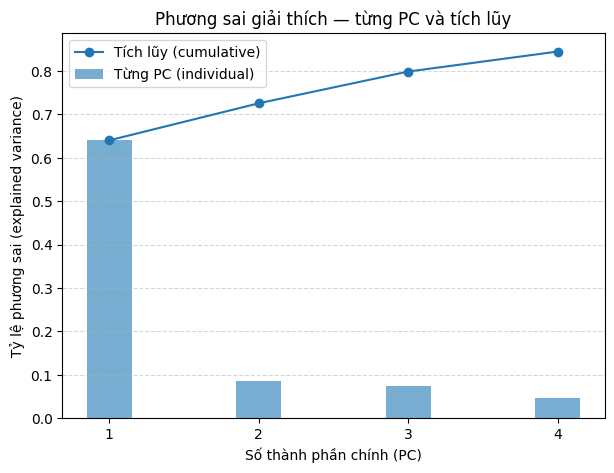

In [31]:
# Xác định lượng thông tin bảo tồn
expl_var_pca = pca.explained_variance_ratio_
print("phương sai giải thích của từng thành phần (PCA):", expl_var_pca)
print("tổng phương sai tích lũy (PCA):", sum(expl_var_pca))

pcs = np.arange(1, len(expl_var_pca)+1)

plt.figure(figsize=(7,5))
plt.plot(pcs, np.cumsum(expl_var_pca), marker='o', label='Tích lũy (cumulative)')
plt.bar(pcs, expl_var_pca, width=0.3, alpha=0.6, label='Từng PC (individual)')
plt.xticks(pcs)
plt.xlabel('Số thành phần chính (PC)')
plt.ylabel('Tỷ lệ phương sai (explained variance)')
plt.title('Phương sai giải thích — từng PC và tích lũy')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

- 4 thành phần đầu giữ lại khoảng 84,5% thông tin so với toàn bộ dữ liệu gốc.
- Thành phần chính đầu giữ 64.04%, thứ hai chiếm 8,54%...

Biểu đồ phân tích phương sai cho thấy Thành phần Chính thứ nhất (PC1) chiếm ưu thế vượt trội, một mình giải thích được khoảng 64% tổng phương sai của bộ dữ liệu.

Các thành phần tiếp theo có đóng góp nhỏ hơn đáng kể:

PC2 giải thích thêm khoảng 8,5%, nâng tổng phương sai tích lũy lên 73%.

Ba thành phần chính đầu tiên (PC1, PC2, và PC3) cùng nhau giải thích được khoảng 80% tổng phương sai. Đây thường được xem là một điểm "khuỷu tay" (elbow point) hợp lý.

Kết luận: Dữ liệu có thể được giảm chiều một cách hiệu quả. PC1 là thành phần mang nhiều thông tin nhất. Việc giữ lại 4 thành phần chính đầu tiên là một lựa chọn tối ưu, cân bằng giữa việc giảm chiều dữ liệu và bảo toàn 80% thông tin (phương sai) của bộ dữ liệu gốc.

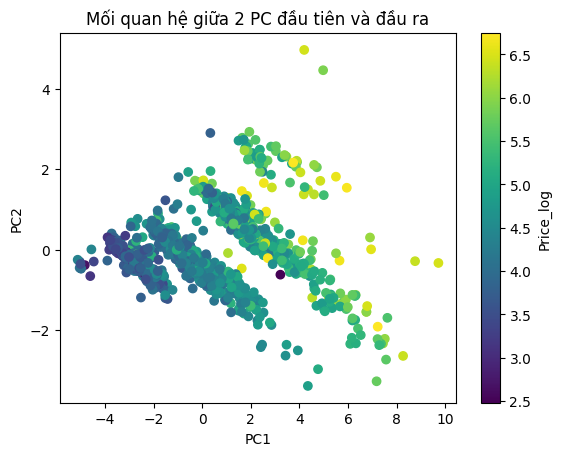

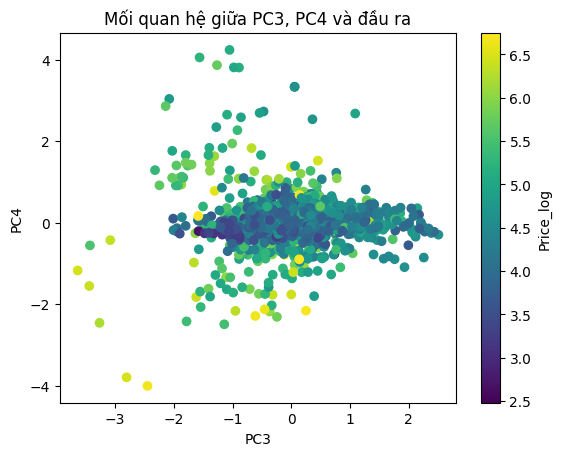

In [32]:
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=y, cmap='viridis')
plt.colorbar(label='Price_log')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Mối quan hệ giữa 2 PC đầu tiên và đầu ra')
plt.show()

plt.scatter(pca_df['PC3'], pca_df['PC4'], c=y, cmap='viridis')
plt.colorbar(label='Price_log')
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.title('Mối quan hệ giữa PC3, PC4 và đầu ra')
plt.show()



Biểu đồ số 1  cho thấy một cấu trúc dự đoán rất rõ ràng:

PC1 (Trục hoành): Thể hiện một mối tương quan tuyến tính dương rất mạnh với Price_log. Có thể thấy rõ khi giá trị PC1 tăng (di chuyển từ trái sang phải), màu sắc của các điểm thay đổi một cách nhất quán từ tím/xanh đậm (giá thấp) sang xanh lá và vàng (giá cao).

PC2 (Trục tung): Không cho thấy một mối tương quan tuyến tính đơn giản trên toàn bộ tập dữ liệu. Thay vào đó, vai trò chính của PC2 là phân tách dữ liệu thành các dải (bands) hoặc cụm (clusters) song song rõ rệt. Dường như PC2 đã phát hiện ra một biến phân loại hoặc biến rời rạc quan trọng trong dữ liệu, tạo ra các nhóm riêng biệt.

Kết luận: Dữ liệu có cấu trúc cao. PC1 là yếu tố dự đoán tuyến tính chính cho giá, trong khi PC2 hoạt động như một yếu tố phân nhóm hiệu quả.

Biểu đồ số 2 cho thấy các điểm dữ liệu phân tán thành một đám mây dày đặc, tập trung chủ yếu quanh gốc tọa độ (0,0). Quan trọng nhất, màu sắc (đại diện cho Price_log) xuất hiện phân bố ngẫu nhiên trong đám mây này. Không có một dải màu (gradient) rõ rệt theo trục PC3 hay PC4.

Kết luận: Không có mối tương quan tuyến tính rõ ràng giữa PC3, PC4 và Price_log. Các thành phần này không cung cấp một cấu trúc rõ rệt để dự đoán giá.



### LDA method

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Chia thành 5 nhóm theo phân vị
y_cat = pd.qcut(y, q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
lda = LDA(n_components=4)
X_lda = lda.fit_transform(X_scaled, y_cat)

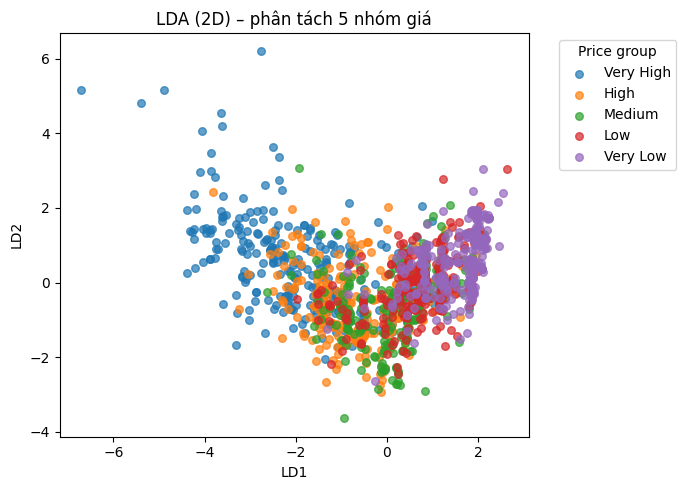

In [34]:
X_lda2 = X_lda[:, :2]

plt.figure(figsize=(7,5))
for c in y_cat.unique():
    idx = (y_cat == c)
    plt.scatter(X_lda2[idx, 0], X_lda2[idx, 1], s=30, label=str(c), alpha=0.7)

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA (2D) – phân tách 5 nhóm giá')
plt.legend(title='Price group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


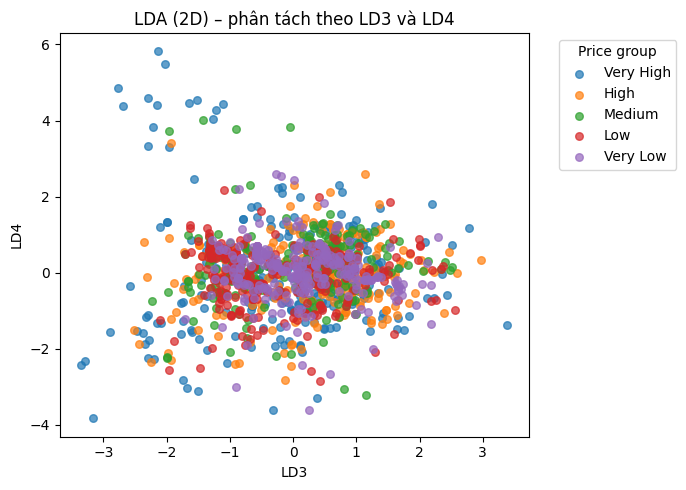

In [35]:
X_lda34 = X_lda[:, 2:4]   # Lấy LD3 và LD4

plt.figure(figsize=(7,5))
for c in y_cat.unique():
    idx = (y_cat == c)
    plt.scatter(X_lda34[idx, 0], X_lda34[idx, 1], s=30, label=str(c), alpha=0.7)

plt.xlabel('LD3')
plt.ylabel('LD4')
plt.title('LDA (2D) – phân tách theo LD3 và LD4')
plt.legend(title='Price group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


LDA chỉ hoạt động khi đầu ra là biến phân loại (categorical), không phải giá trị liên tục.
Vì Price_log là đầu ra liên tục, ta cần phân nhóm giá để LDA có thể dùng được

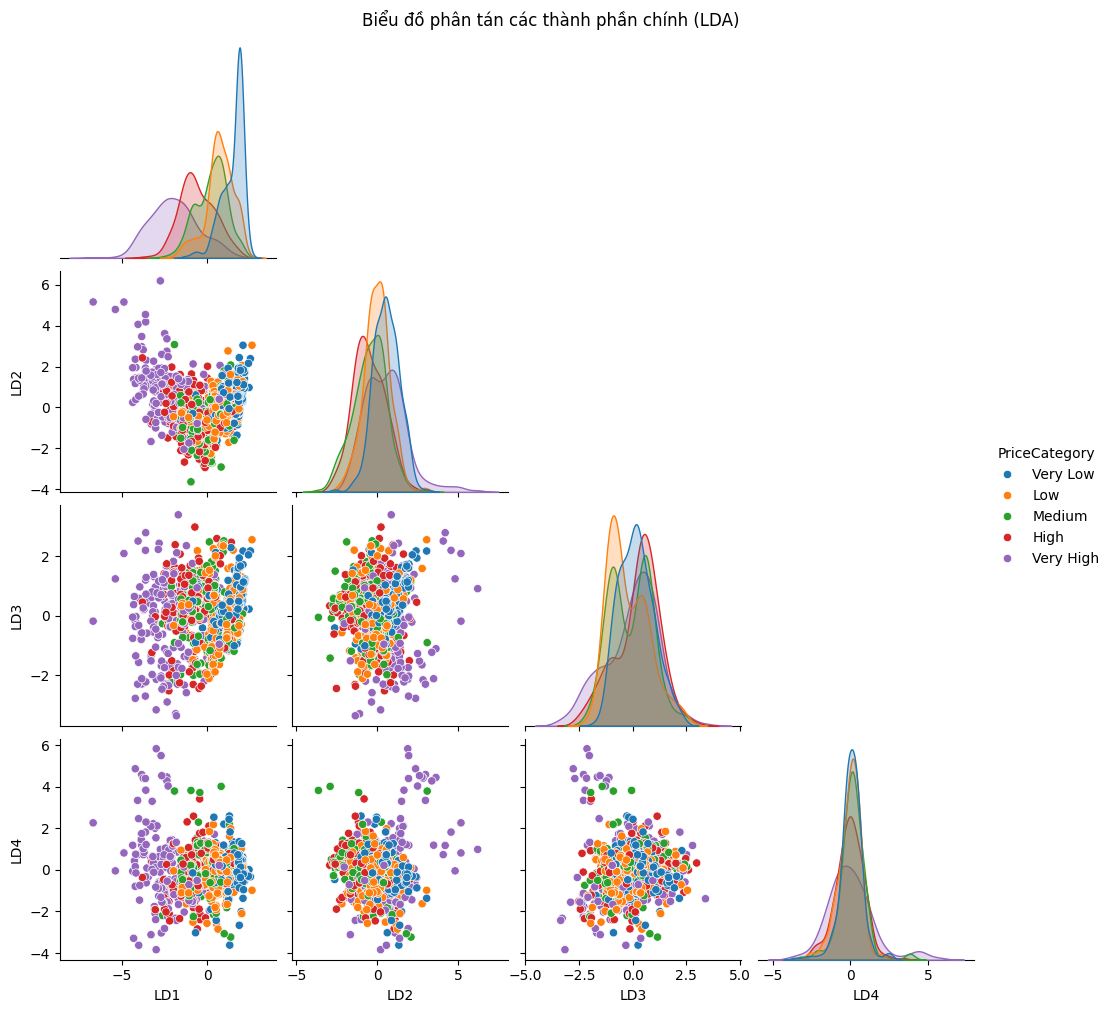

In [36]:
lda_df = pd.DataFrame(X_lda, columns=[f'LD{i+1}' for i in range(4)])
lda_df['PriceCategory'] = y_cat
lda_df['Price_log'] = y.values
# Visualization
sns.pairplot(lda_df, vars=['LD1','LD2','LD3','LD4'], hue='PriceCategory', diag_kind='kde', corner=True)
plt.suptitle('Biểu đồ phân tán các thành phần chính (LDA)', y=1.01)
plt.show()

Khả năng tách phân lớp của từng thành phần (LDA): [0.8530557  0.1267787  0.01700661 0.003159  ]
Tổng khả năng tách phân lớp (LDA): 0.9999999999999999


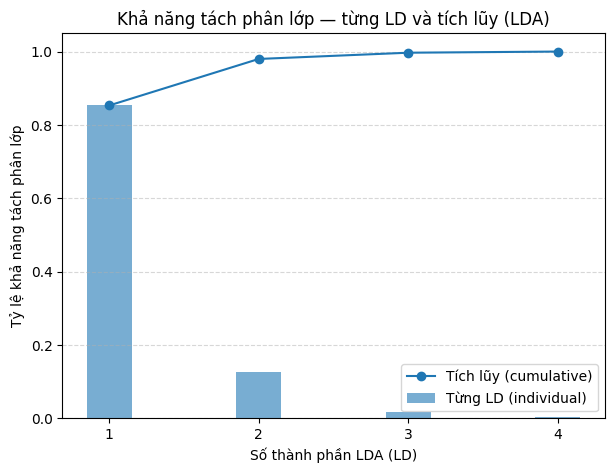

In [37]:
expl_var_lda = lda.explained_variance_ratio_
print("Khả năng tách phân lớp của từng thành phần (LDA):", expl_var_lda)
print("Tổng khả năng tách phân lớp (LDA):", sum(expl_var_lda))

# visualization
lds = np.arange(1, len(expl_var_lda) + 1)
plt.figure(figsize=(7,5))
plt.plot(lds, np.cumsum(expl_var_lda), marker='o', label='Tích lũy (cumulative)')
plt.bar(lds, expl_var_lda, width=0.3, alpha=0.6, label='Từng LD (individual)')
plt.xticks(lds)
plt.xlabel('Số thành phần LDA (LD)')
plt.ylabel('Tỷ lệ khả năng tách phân lớp')
plt.title('Khả năng tách phân lớp — từng LD và tích lũy (LDA)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

gần như toàn bộ "sức mạnh" phân loại của mô hình nằm ở hai thành phần đầu tiên (LD1 và LD2), chiếm tới 98% (85.3% + 12.7%) khả năng phân tách.

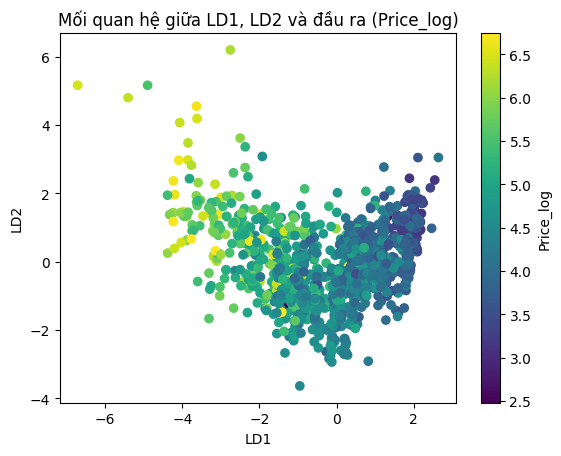

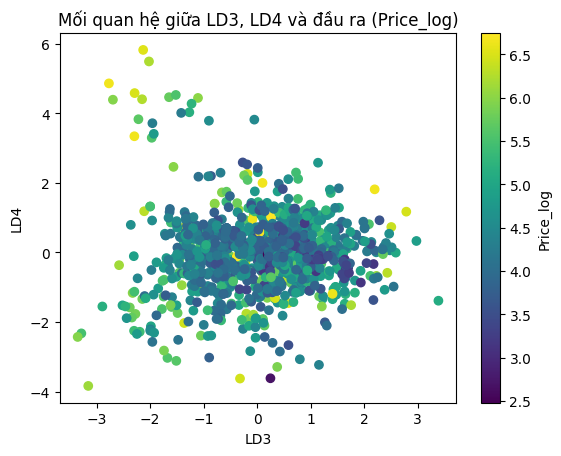

In [38]:
# Trực quan hóa mối quan hệ giữa các thành phần LDA và đầu ra
plt.scatter(lda_df['LD1'], lda_df['LD2'], c=lda_df['Price_log'], cmap='viridis')
plt.colorbar(label='Price_log')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('Mối quan hệ giữa LD1, LD2 và đầu ra (Price_log)')
plt.show()

plt.scatter(lda_df['LD3'], lda_df['LD4'], c=lda_df['Price_log'], cmap='viridis')
plt.colorbar(label='Price_log')
plt.xlabel('LD3')
plt.ylabel('LD4')
plt.title('Mối quan hệ giữa LD3, LD4 và đầu ra (Price_log)')
plt.show()

Biểu đồ 1 cho thấy một mối tương quan tuyến tính âm (nghịch) rất rõ rệt giữa LD1 (trục hoành) và Price_log.

Quan sát: Khi giá trị LD1 tăng (di chuyển từ trái sang phải), màu sắc của các điểm dữ liệu thay đổi một cách nhất quán từ vàng/xanh lá (Price_log cao) sang xanh đậm/tím (Price_log thấp).

Kết luận: LD1 là một yếu tố dự đoán tuyến tính mạnh mẽ cho giá. Ngược lại, trục LD2 không thể hiện một mối tương quan tuyến tính rõ ràng.


Biểu đồ 2 cho thấy không có mối tương quan tuyến tính nào có thể quan sát được.

Quan sát: Các điểm dữ liệu phân tán thành một "đám mây" (cloud) tập trung. Quan trọng nhất, màu sắc (đại diện cho Price_log) xuất hiện phân bố ngẫu nhiên trên toàn bộ biểu đồ. Không có một dải màu (gradient) hay xu hướng nào rõ rệt theo trục LD3 hay LD4.

Kết luận: Các thành phần LD3 và LD4 dường như chỉ chứa "nhiễu" (noise) và không có khả năng dự đoán tuyến tính đối với Price_log.